In [1]:
#import tensorflow
import warnings
warnings.filterwarnings ('ignore')
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from keras.utils.vis_utils import plot_model
from keras.wrappers.scikit_learn import KerasRegressor
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


Using TensorFlow backend.


In [2]:
def LabelEncode(df_local):
    for col in df_local.columns:
        col_dict = {}
        if df_local[col].dtype!='object':
            continue
        elif df_local[col].dtype=='object':
            col2=df_local[col].unique()
            z=0
            for i in col2:
                col_dict[i]=z
                z+=1
            df_local[col]=df_local[col].map(col_dict)
        
            
    return df_local

data=pd.read_csv("auto-mpg.csv")
data.head()

print(data.columns)
data.fillna(0)
print(data.columns)
df_encode = LabelEncode(data)
df_encode.shape

X = ['cylinders', 'displacement', 'horsepower', 'weight',
        'model year', 'origin', 'car name' ]
#X=['weight', 'model year', 'origin']

Y = ['mpg']
# X_train, X_test, Y_train, Y_test = train_test_split(df_encode[X],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)
# df_train=pd.concat([X_train, Y_train], axis=1).reindex(X_train.index)
# df_test=pd.concat([X_test, Y_test], axis=1).reindex(X_test.index)
# print(df_train.size)
# print(df_test.size)
X_train, X_test, Y_train, Y_test = train_test_split(df_encode[X],df_encode[Y], test_size=0.25, random_state=42, shuffle=True)


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')
Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')


In [3]:
# Scale both training and testing input data

X_train = preprocessing.scale(X_train)

X_test = preprocessing.scale(X_test)
# Y_train = preprocessing.scale(Y_train)
# Y_test = preprocessing.scale(Y_test)

activation_list = ['relu', 'sigmoid', 'tanh', 'elu']
r2_list = []

Activation Function: relu
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


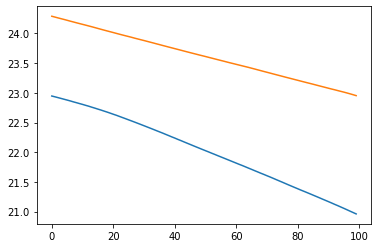

Activation Function: sigmoid
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


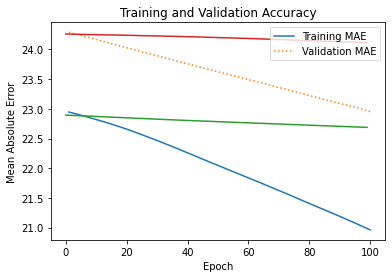

Activation Function: tanh
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


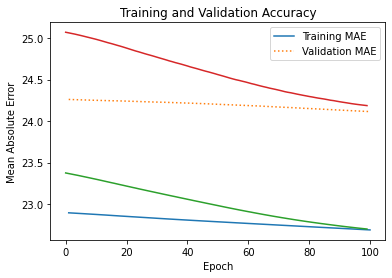

Activation Function: elu
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


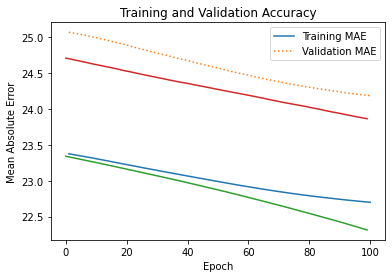

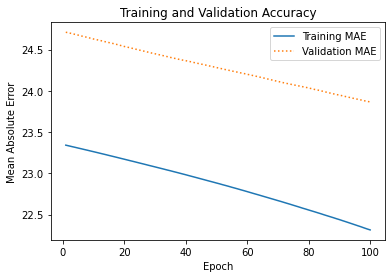

In [6]:
#Defines linear regression model and its structure

for i in activation_list:
    print("Activation Function:" , i)
    model = Sequential()
    model.add(Dense(1,input_dim=len(X), activation=i))
    model.compile(optimizer='adam', loss='mae', metrics=['mae']) 
    #model.compile(Adam(lr=0.003), 'mean_squared_error')

    print(model.summary())

    #Fits model
    history = model.fit(X_train, Y_train, epochs = 100, validation_split = 0.1,verbose = 0)
    history_dict=history.history
    print(history_dict.keys())
    #Plots model's training cost/loss and model's validation split cost/loss
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    #plt.figure()
    plt.plot(loss_values,label='training loss')
    plt.plot(val_loss_values,label='val training loss')
    plt.show()
    # Runs model (the one with the activation function, although this doesn't really matter as they perform the same) 
    # with its current weights on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)



    epochs = range(1, len(loss_values) + 1)
    plt.plot()
    plt.plot(epochs, loss_values, '-', label='Training MAE')
    plt.plot(epochs, val_loss_values, ':', label='Validation MAE')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='upper right')
    plt.plot()

    # Calculates and prints r2 score of training and testing data
    #print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_train, y_train_pred)))
    r2_list.append(r2_score(Y_test, y_test_pred))
    #print("The R2 score on the Test set is:\t{:0.3f}".format()

In [7]:
print("Neural Net 2 Layers")

for i in range(len(activation_list)):
    print("R2 value for using activation function %s : %s", activation_list[i], r2_list[i])

Neural Net 2 Layers
R2 value for using activation function %s : %s relu -6.938877485682981
R2 value for using activation function %s : %s sigmoid -9.14677875965596
R2 value for using activation function %s : %s tanh -9.158552352735985
R2 value for using activation function %s : %s elu -9.016795908428906


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 13)                104       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 14        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


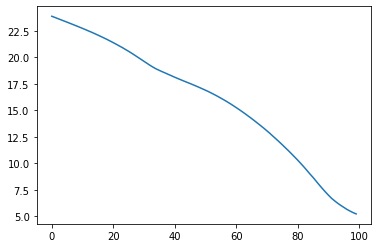

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 13)                104       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 14        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


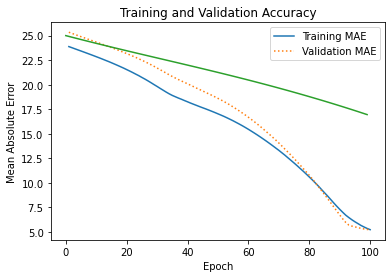

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 13)                104       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 14        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


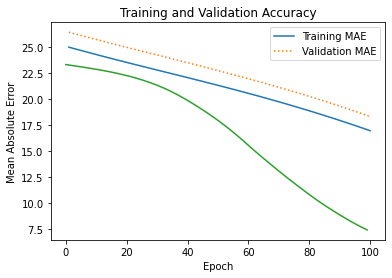

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 13)                104       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 14        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________
None
dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])


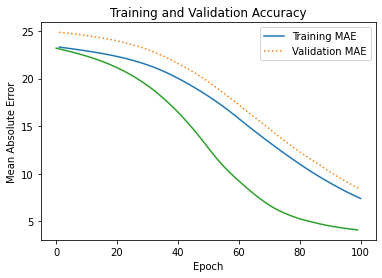

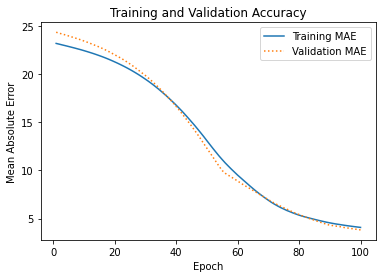

In [8]:
#Defines linear regression model and its structure
r2_list = []
for i in activation_list:
    model = Sequential()
    #model.add(Dense(1, input_shape=(7,)))
    model.add(Dense(13, input_dim=len(X), activation=i))
    model.add(Dense(1))

    #Compiles model
    #plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
    # optimizer=’adam’ tells Keras to use the Adam optimizer to adjust weights and biases in each 
    # backpropagation pass during training. Adam is one of eight optimizers that are built into Keras,
    # and it is among the most advanced. 
    # It uses an adaptive learning rate and it is always the one I start with in the absence of a compelling reason to do otherwise.
    model.compile(optimizer='adam', loss='mae', metrics=['mae']) 
    #model.compile(Adam(lr=0.003), 'mean_squared_error')

    print(model.summary())

    #Fits model
    history = model.fit(X_train, Y_train, epochs = 100, validation_split = 0.1,verbose = 0)
    history_dict=history.history
    print(history_dict.keys())
    #Plots model's training cost/loss and model's validation split cost/loss
    loss_values = history_dict['loss']
    val_loss_values=history_dict['val_loss']
    #plt.figure()
    plt.plot(loss_values,label='training loss')
    plt.show()
    # Runs model (the one with the activation function, although this doesn't really matter as they perform the same) 
    # with its current weights on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)



    epochs = range(1, len(loss_values) + 1)

    plt.plot(epochs, loss_values, '-', label='Training MAE')
    plt.plot(epochs, val_loss_values, ':', label='Validation MAE')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend(loc='upper right')
    plt.plot()
    r2_list.append(r2_score(Y_test, y_test_pred))
    # Calculates and prints r2 score of training and testing data
#     print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_train, y_train_pred)))
#     print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_test, y_test_pred)))

In [9]:
print("Neural Net 3 Layers")
for i in range(len(activation_list)):
    print("R2 value for using activation function %s : %s", activation_list[i], r2_list[i])

Neural Net 3 Layers
R2 value for using activation function %s : %s relu 0.3184589315131897
R2 value for using activation function %s : %s sigmoid -5.051139310703645
R2 value for using activation function %s : %s tanh -0.5729996240245498
R2 value for using activation function %s : %s elu 0.6243469194896663
